In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_348\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

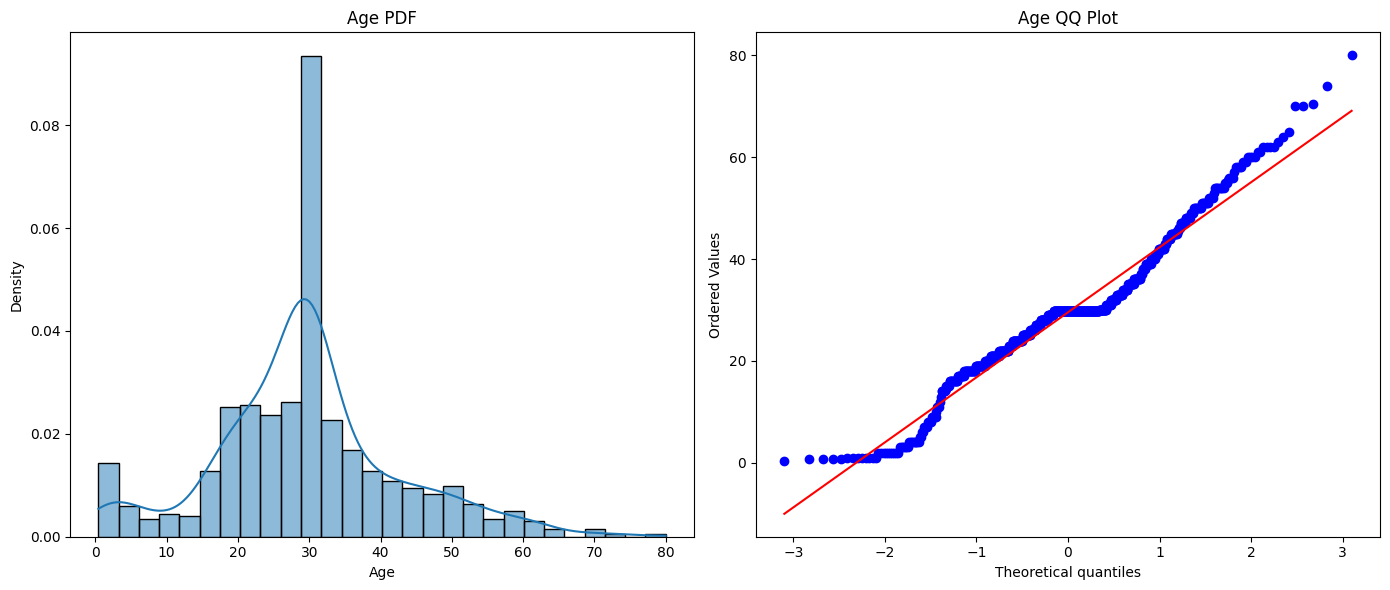

In [7]:
plt.figure(figsize=(14, 6))

# First subplot for the PDF of 'Fare'
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True,stat='density')
plt.title('Age PDF')

# Second subplot for the QQ Plot of 'Fare'
plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.tight_layout()
plt.show()

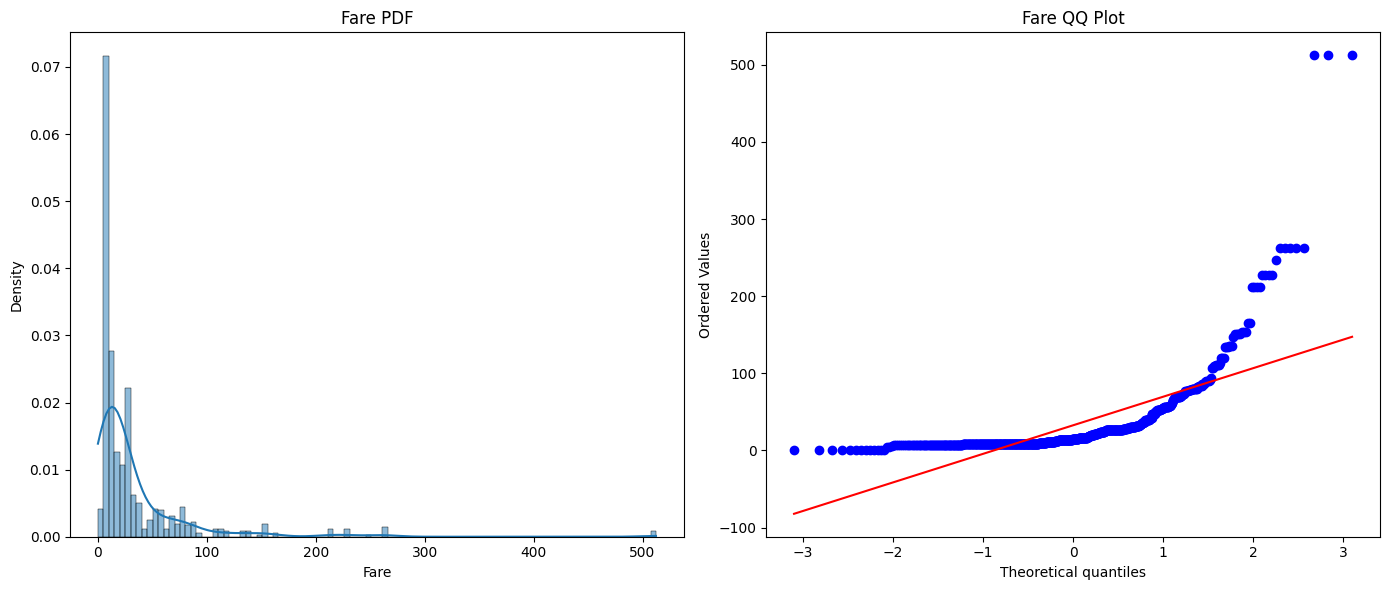

In [8]:
plt.figure(figsize=(14, 6))

# First subplot for the PDF of 'Fare'
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True,stat='density')
plt.title('Fare PDF')

# Second subplot for the QQ Plot of 'Fare'
plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.tight_layout()
plt.show()

In [9]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [10]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [11]:
trf=FunctionTransformer(func=np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))


Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


In [12]:
X_transformed=trf.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6599500624219725


Text(0.5, 1.0, 'Fare after Log')

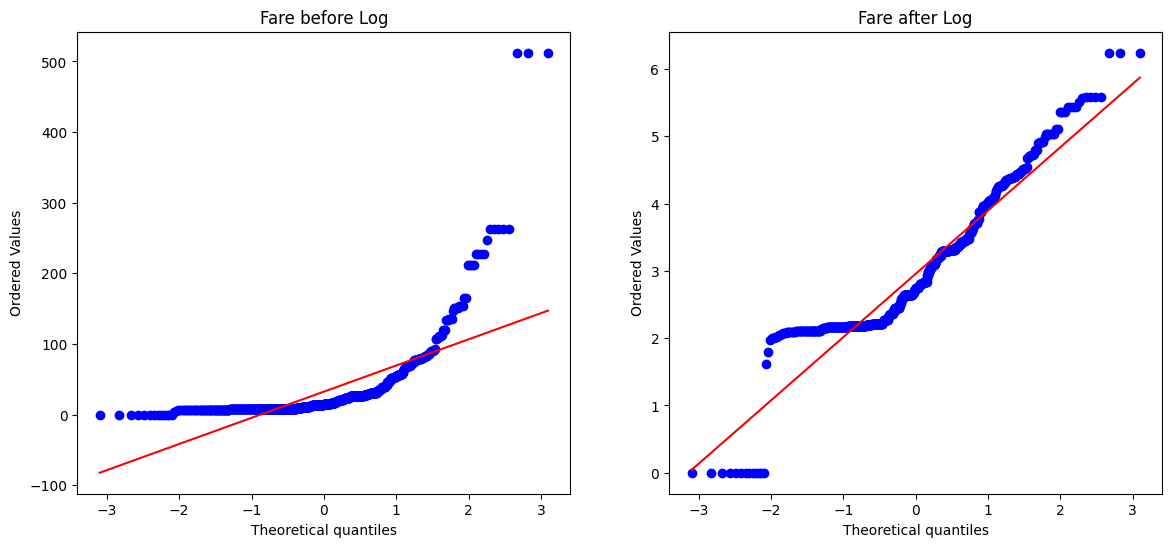

In [13]:
plt.figure(figsize=(14,6))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare before Log")

plt.subplot(122)
stats.probplot(X_train_transformed["Fare"],dist='norm',plot=plt)
plt.title('Fare after Log')

Text(0.5, 1.0, 'Age after Log')

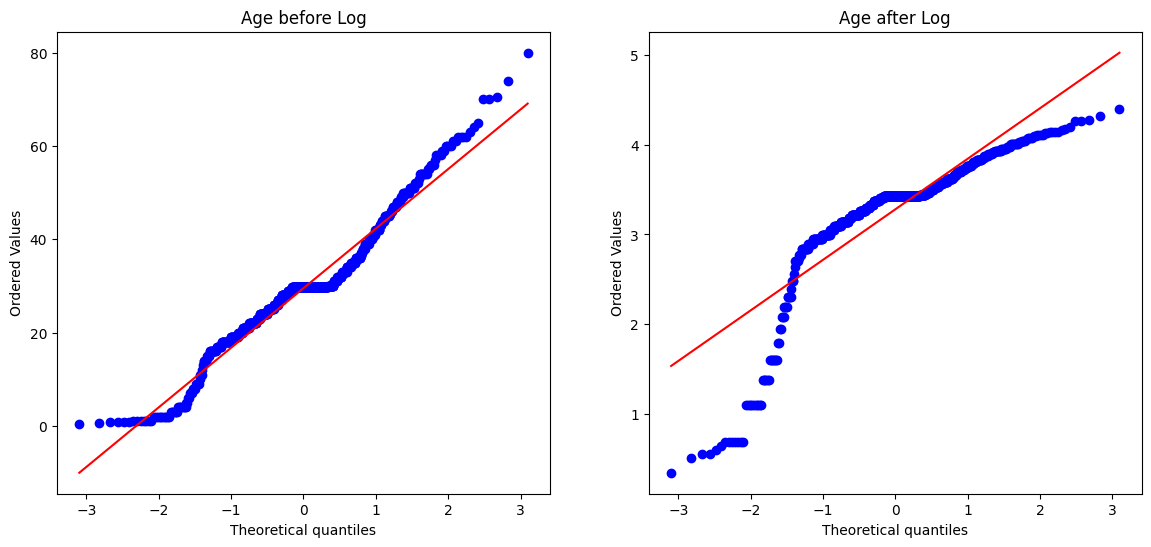

In [14]:
plt.figure(figsize=(14,6))

plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age before Log")

plt.subplot(122)
stats.probplot(X_train_transformed["Age"],dist='norm',plot=plt)
plt.title('Age after Log')

In [15]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred=clf.predict(X_test_transformed2)
y_pred1=clf2.predict(X_test_transformed2)

print('LR',accuracy_score(y_test,y_pred))
print("DT",accuracy_score(y_test,y_pred1))

LR 0.6703910614525139
DT 0.6759776536312849


In [18]:
X_transformed2=trf2.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6622097378277154


In [22]:
def apply_transform(transform):
    X=df.iloc[:,1:3]
    y=df.iloc[:,0]
    
    trf=ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans=trf.fit_transform(X)
    
    clf=LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    stats.probplot(X['Fare'],dist='norm',plot=plt)
    plt.title('Fare Before Transform')
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist='norm',plot=plt)
    plt.title('Fare After Transform')
    
    plt.show()
    

Accuracy 0.6589013732833957


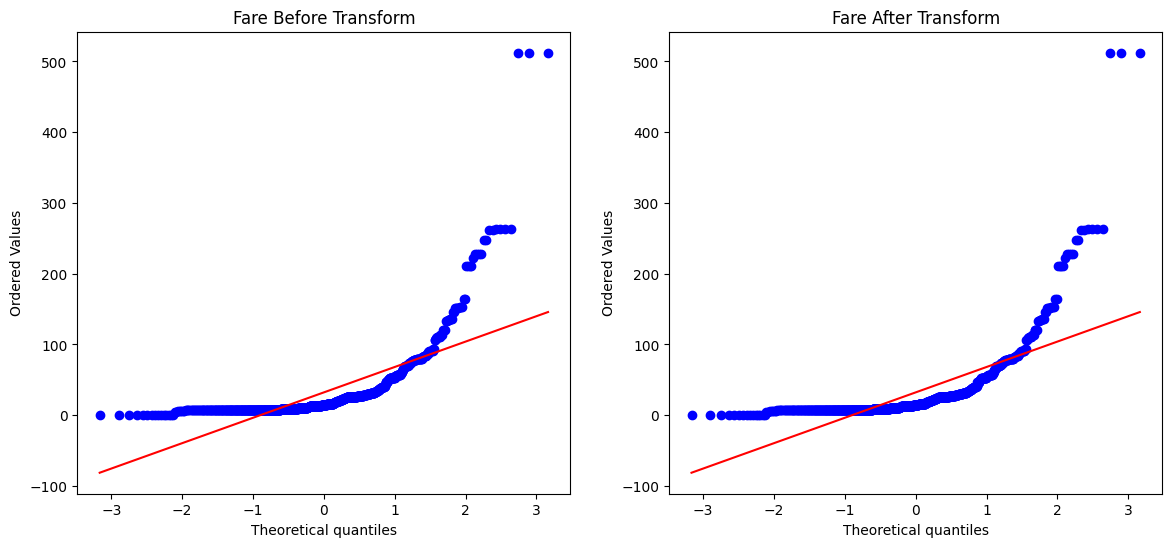

In [37]:
apply_transform(lambda x: x)